# Modify Battery Storage Parameters Example
---
In this example, we will show how to modify the battery storage parameters in the hybrid plant simulation. The major change is from using the default dispatch which is a profit maximization objective function to a load following objective function. The load follow objective will minimize system operating costs while load following.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
import numpy as np

from hopp import ROOT_DIR
from hopp.simulation import HoppInterface
from hopp.utilities import load_yaml
from hopp.simulation.technologies.sites import SiteInfo, flatirons_site
from hopp.tools.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)


/Users/cirmas/workspace/HOPP/examples/log/hybrid_systems_2023-11-22T11.29.41.910031.log


### Set Site Information
Set wind and solar resource data at plant location and load pricing data. In this example, we use the Flatirons site as an example location.

**NOTE**: For a load following objective function the `desired_schedule` must be set.

In [2]:
DEFAULT_SOLAR_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "solar" / "35.2018863_-101.945027_psmv3_60_2012.csv"
DEFAULT_WIND_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "wind" / "35.2018863_-101.945027_windtoolkit_2012_60min_80m_100m.srw"
DEFAULT_PRICE_FILE = ROOT_DIR.parent / "resource_files" / "grid" / "pricing-data-2015-IronMtn-002_factors.csv"

baseload_limit_kw = float(30 * 1000)
baseload_percent = 95.0
DEFAULT_LOAD = baseload_limit_kw*np.ones((8760))/1000

site = SiteInfo(
        flatirons_site,
        solar_resource_file=DEFAULT_SOLAR_RESOURCE_FILE,
        wind_resource_file=DEFAULT_WIND_RESOURCE_FILE,
        grid_resource_file=DEFAULT_PRICE_FILE,
        desired_schedule=DEFAULT_LOAD,
        solar=True,
        wind=True,
        wave=False
    )

### Create the HOPP Model
To generate the HOPP Model, instantiate the `HoppInterface` class and supply the required YAML configuration.

`HOPPInterface` is capable of handling dictionary input as well as class instances. Here we demonstrate this by loading the YAML file as a dict, modifying it to include our site information, then passing it as an argument to `HoppInterface`. This is useful for programmatic configuration of simulation configs.

In [3]:
hopp_config = load_yaml("./inputs/04-load-following-battery.yaml")
# set SiteInfo instance
hopp_config["site"] = site

### Create the Simulation Model
Instantiate the `HoppInterface` class by providing our modified configuration dict.

In [4]:
hi = HoppInterface(hopp_config)

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [5]:
hi.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [6]:
hybrid_plant = hi.system

print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.7997475965517965
Annual Energies:
{"pv": 104289820.46059448, "wind": 156936144.3525466, "battery": -889953.4932451078, "hybrid": 194867913.4707997}
Net Present Values:
{"pv": -33228711.275178522, "wind": -45594126.58064542, "battery": -26991661.791218758, "hybrid": -114059296.07410274}
Total Revenues:
{"pv": [0.0, 101039.82924074498, 102050.22753315243, 103070.72980848397, 104101.4371065688, 105142.45147763449, 106193.87599241086, 107255.81475233496, 108328.3728998583, 109411.65662885687, 110505.77319514545, 111610.8309270969, 112726.93923636786, 113854.20862873156, 114992.75071501888, 116142.67822216907, 117304.10500439075, 118477.14605443468, 119661.917514979, 120858.53669012879, 122067.12205703008], "wind": [0.0, 154112.71406684216, 155653.8412075106, 157210.37961958573, 158782.48341578158, 160370.30824993938, 161974.01133243882, 163593.7514457632, 165229.6889602208, 166881.985849823, 168550.80570832125, 170236.31376540445, 171938.67690305848

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

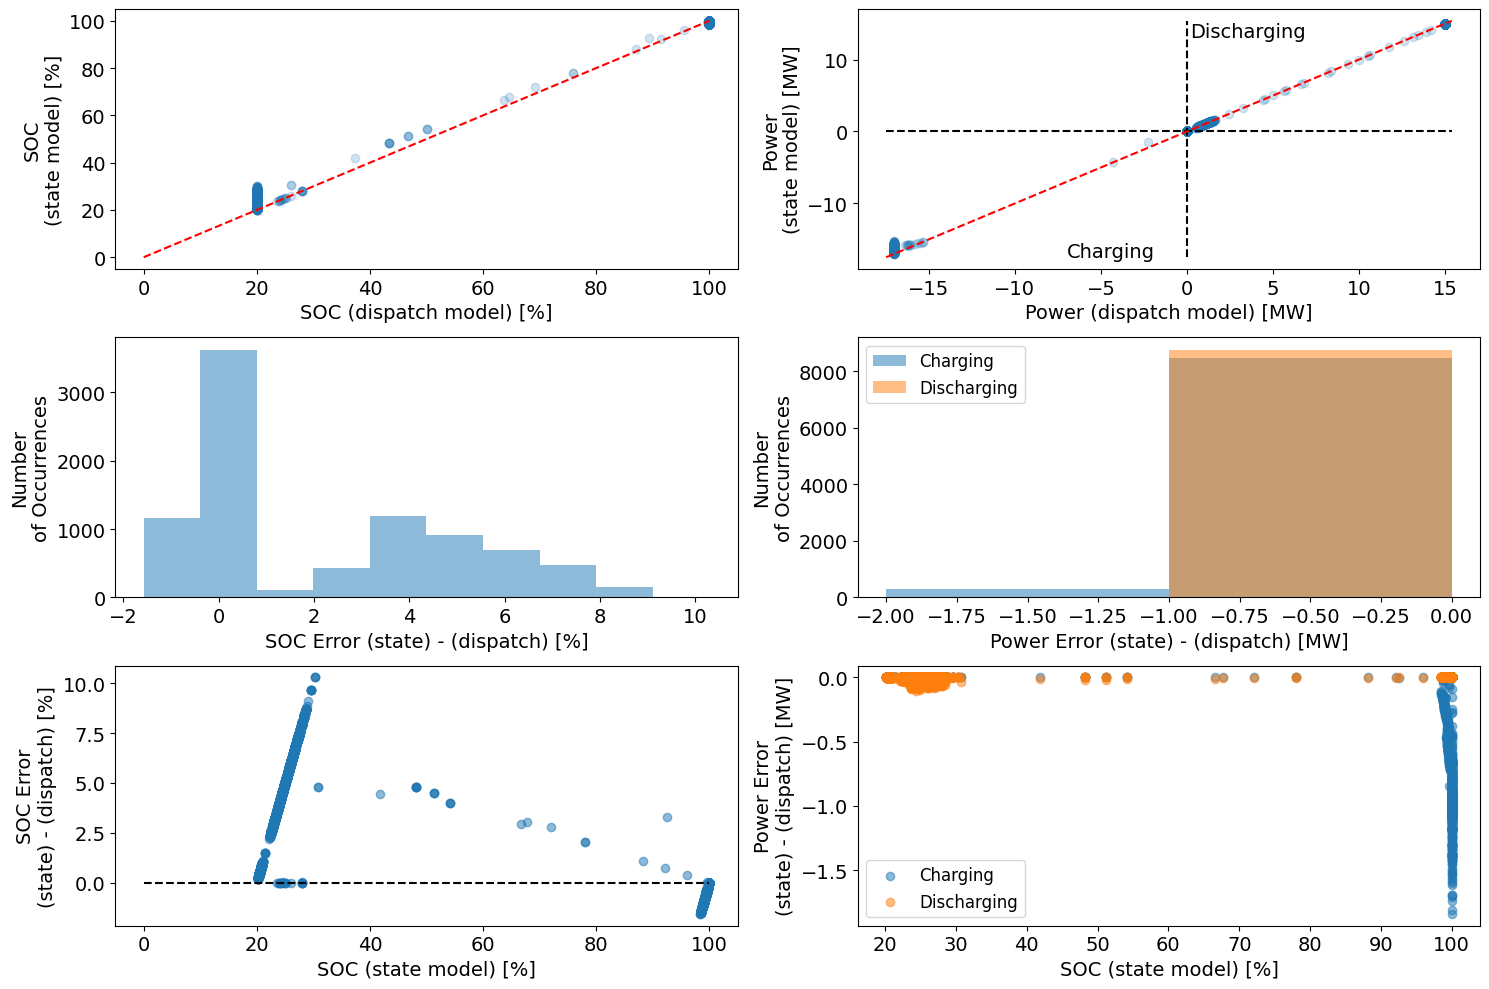

In [7]:
plot_battery_dispatch_error(hybrid_plant)

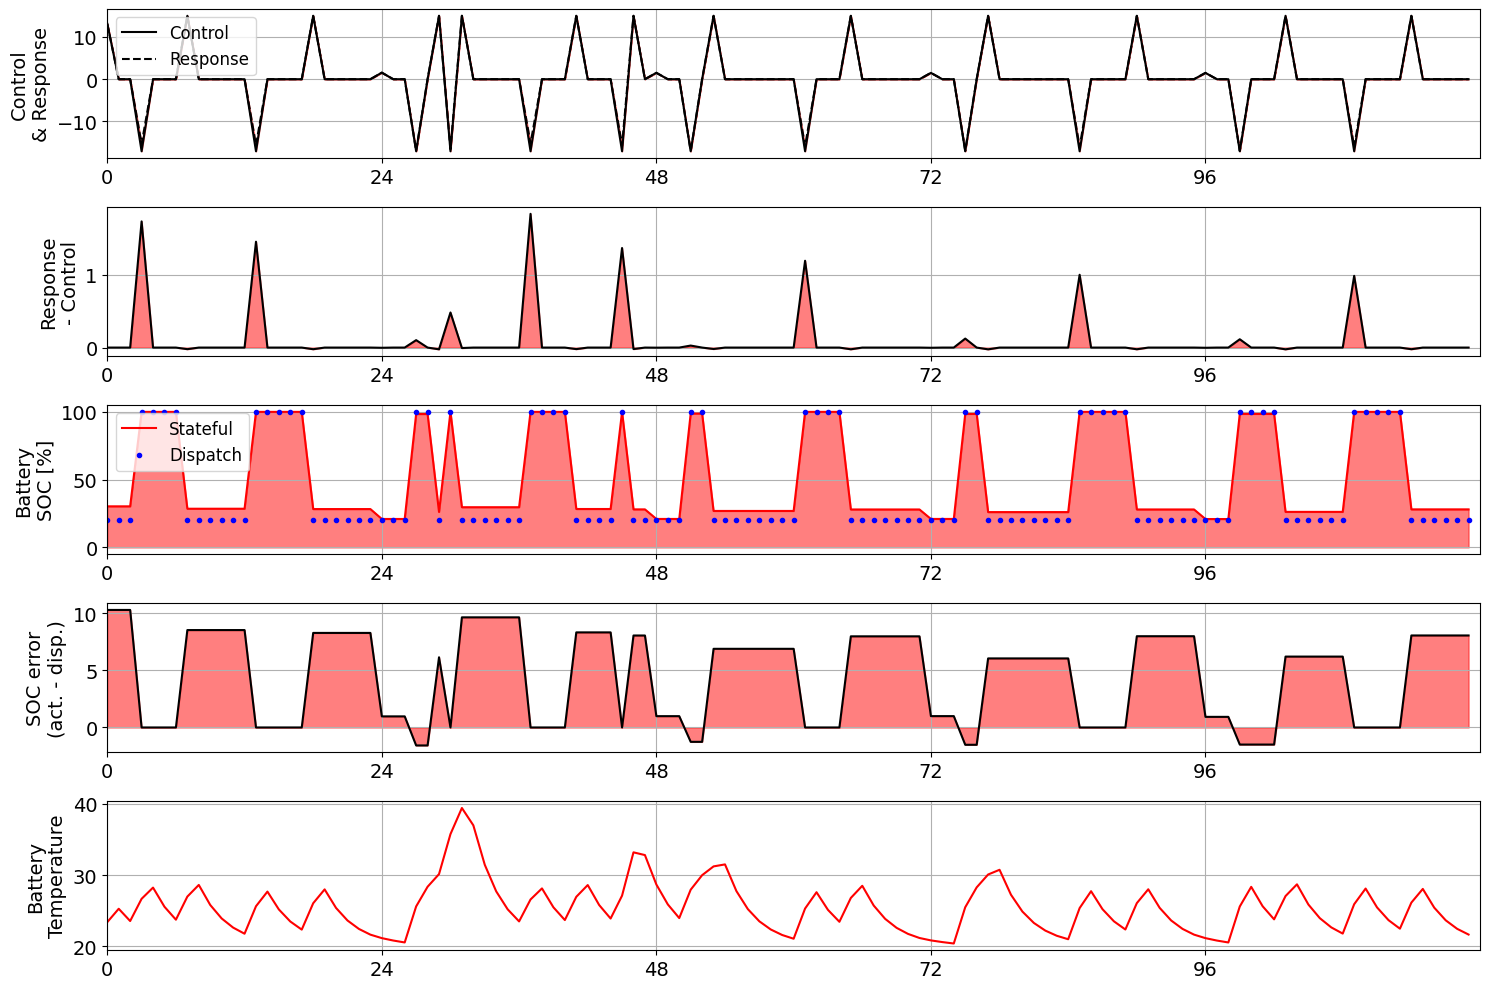

In [8]:
plot_battery_output(hybrid_plant)

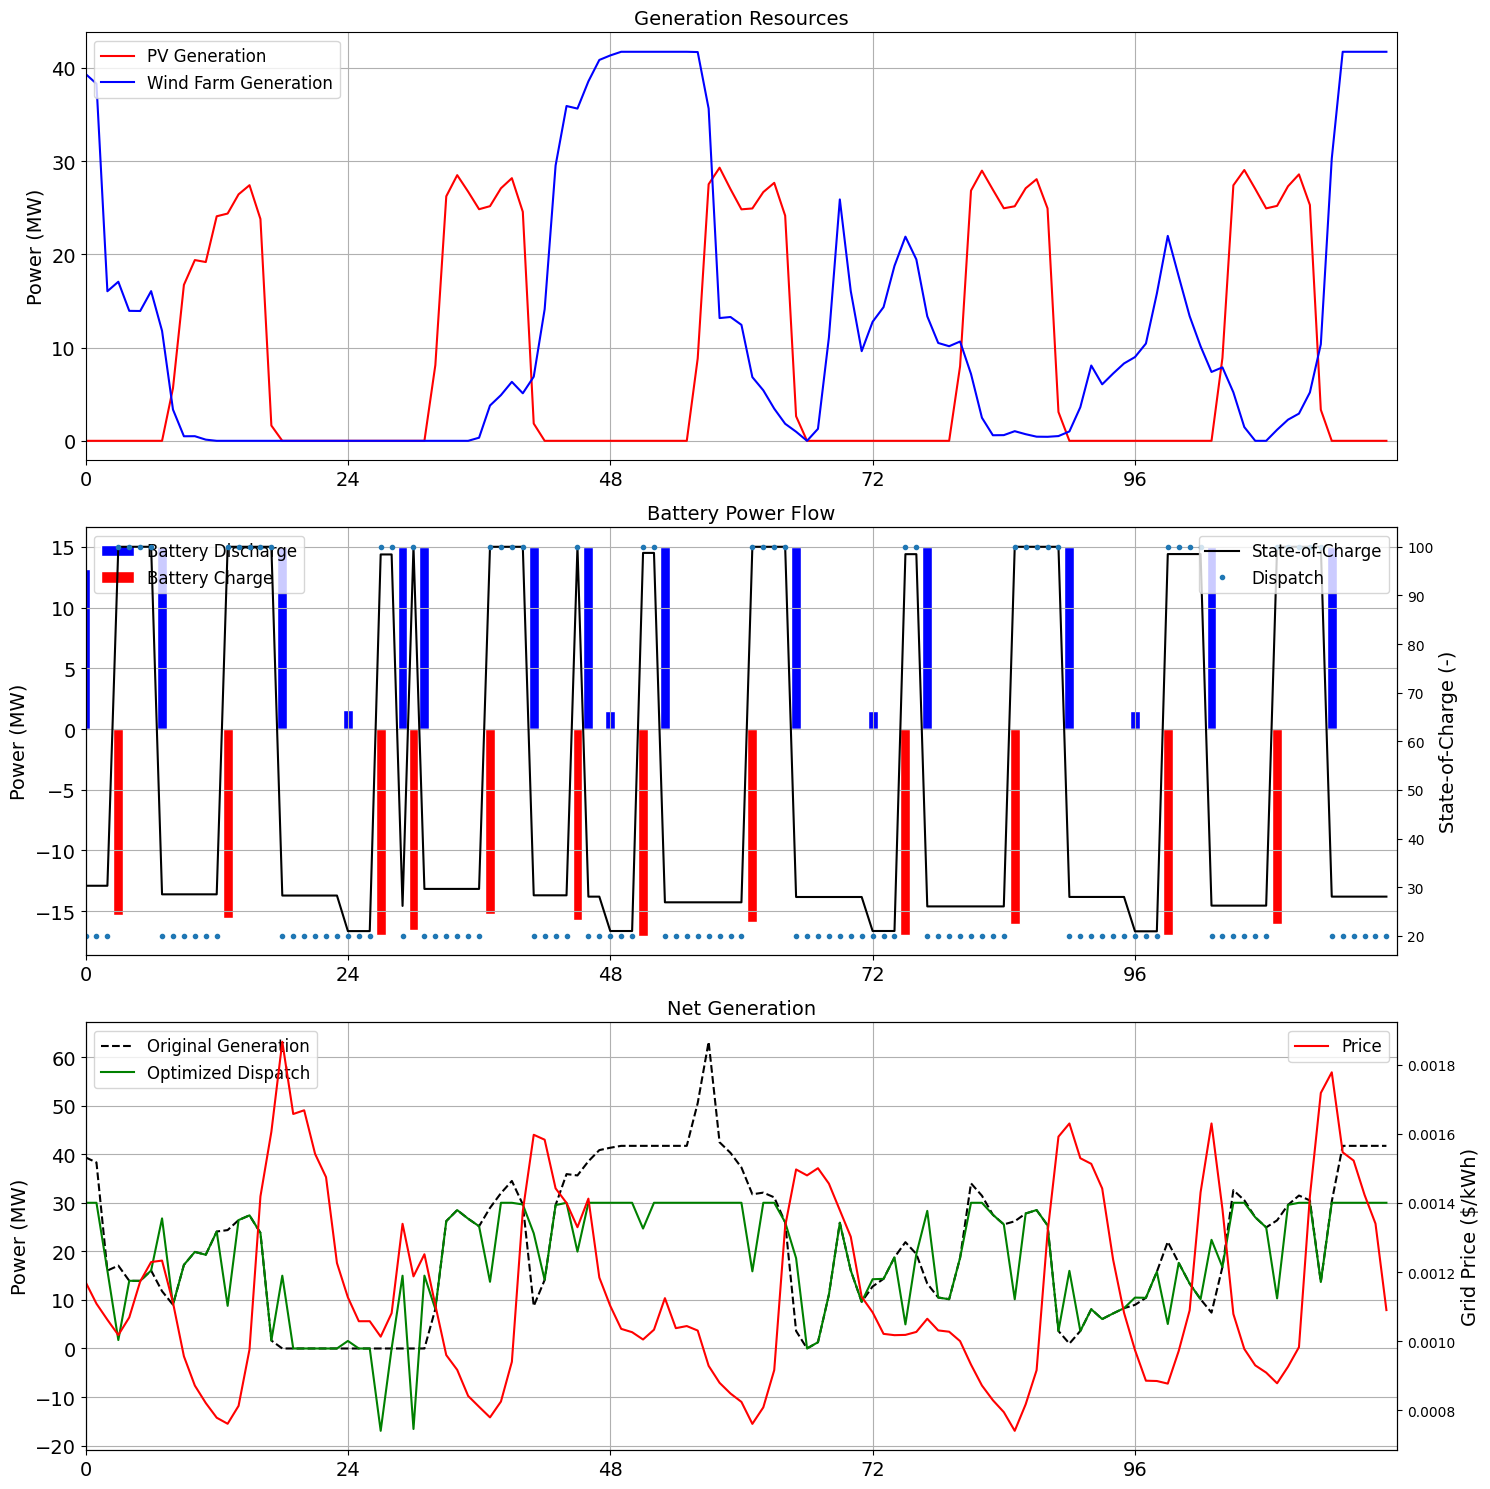

In [9]:
plot_generation_profile(hybrid_plant)